In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

import joblib

In [ ]:
data = pd.read_csv('student dropout.csv')
df = pd.DataFrame(data)

Data Display

In [ ]:
df

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,False
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,False
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,False
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,False
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,False
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,True
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,False


In [ ]:
df.shape

(649, 34)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   School                       649 non-null    object
 1   Gender                       649 non-null    object
 2   Age                          649 non-null    int64 
 3   Address                      649 non-null    object
 4   Family_Size                  649 non-null    object
 5   Parental_Status              649 non-null    object
 6   Mother_Education             649 non-null    int64 
 7   Father_Education             649 non-null    int64 
 8   Mother_Job                   649 non-null    object
 9   Father_Job                   649 non-null    object
 10  Reason_for_Choosing_School   649 non-null    object
 11  Guardian                     649 non-null    object
 12  Travel_Time                  649 non-null    int64 
 13  Study_Time                   649 no

In [ ]:
df.describe()

,Age,Mother_Education,Father_Education,Travel_Time,Study_Time,Number_of_Failures,Family_Relationship,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


Missing Values

In [ ]:
df.isnull().sum()

,0
School,0
Gender,0
Age,0
Address,0
Family_Size,0
Parental_Status,0
Mother_Education,0
Father_Education,0
Mother_Job,0
Father_Job,0


Duplicated Values

In [ ]:
df.duplicated().sum()

np.int64(0)

Visualizing Numeric Data

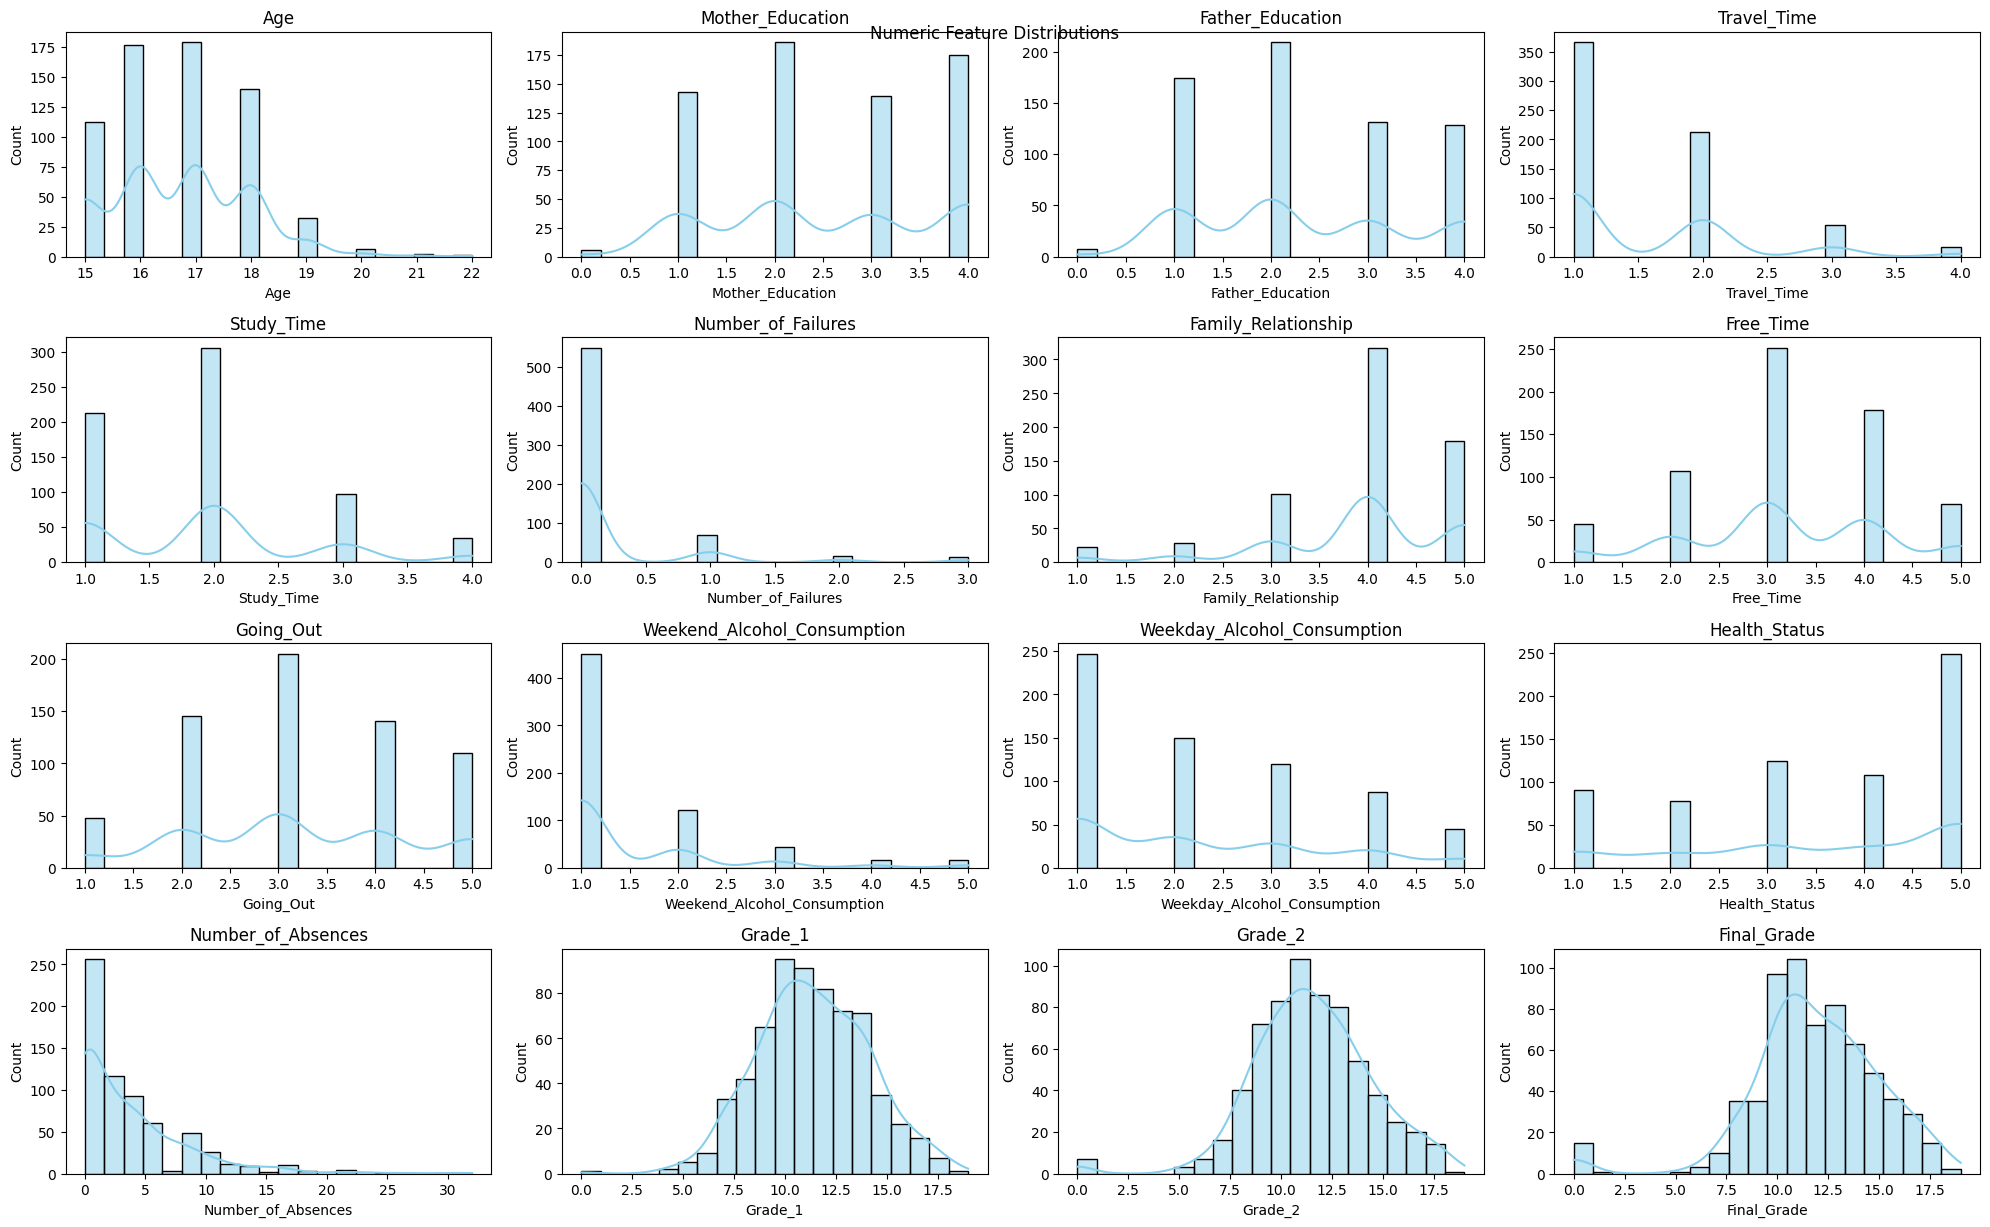

In [ ]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.select_dtypes(include=['int64']).columns):
    plt.subplot(5, 4, i + 1)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Numeric Feature Distributions")
plt.show()


In [ ]:
dfCleaned = df.copy()

dfCleaned["Dropped_Out"] = dfCleaned["Dropped_Out"].astype(int)

# Identify column types
binary_cols = [col for col in dfCleaned.columns if dfCleaned[col].nunique() == 2 and dfCleaned[col].dtype == "object"]
multi_cat_cols = [col for col in dfCleaned.select_dtypes(include="object").columns if col not in binary_cols]

# Label Encoding for binary columns
le = LabelEncoder()
for col in binary_cols:
    dfCleaned[col] = le.fit_transform(dfCleaned[col])

# One-Hot Encoding for multi-category columns
dfCleaned = pd.get_dummies(dfCleaned, columns=multi_cat_cols, drop_first=True)

Outlier Handling

In [ ]:
threshold = dfCleaned['Number_of_Absences'].quantile(0.95)
dfCleaned['Number_of_Absences'] = np.where(dfCleaned['Number_of_Absences']>threshold , threshold , dfCleaned['Number_of_Absences'])

Train Test Split

In [ ]:
x = dfCleaned.drop('Dropped_Out', axis=1)
y = dfCleaned['Dropped_Out']
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(x, y):
    x_train = x.loc[train_index]
    x_test = x.loc[test_index]
    y_train = y.loc[train_index]
    y_test = y.loc[test_index]

Logistic Regression Model

In [ ]:
#Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
y_predicr_lr = lr.predict(x_test)

In [ ]:
print("Logistic Regression Evaluation")
print("Classification Report\n", classification_report(y_test, y_predicr_lr))
print("Confusion matrix: \n", confusion_matrix(y_test, y_predicr_lr))
print("Accuracy Score", accuracy_score(y_test, y_predicr_lr))
print("ROC AUC Score", roc_auc_score(y_test, y_predicr_lr))

Logistic Regression Evaluation
Classification Report
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       110
           1       0.95      0.90      0.92        20

    accuracy                           0.98       130
   macro avg       0.96      0.95      0.95       130
weighted avg       0.98      0.98      0.98       130

Confusion matrix: 
 [[109   1]
 [  2  18]]
Accuracy Score 0.9769230769230769
ROC AUC Score 0.9454545454545455


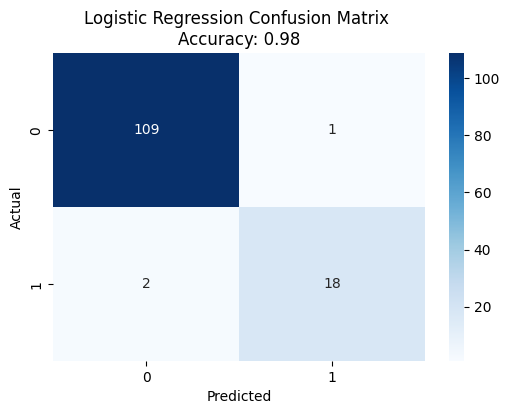

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_predicr_lr), annot =True, fmt='d', cmap='Blues')
plt.title(f'Logistic Regression Confusion Matrix \nAccuracy: {accuracy_score(y_test, y_predicr_lr):.2f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forset Model

In [ ]:
#Random Forest
rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
rf.fit(x_train, y_train)
y_predict_rf = rf.predict(x_test)

In [ ]:
print("Random Forest Evaluation")
print("Classification Report\n", classification_report(y_test, y_predict_rf))
print("Confusion matrix: \n", confusion_matrix(y_test, y_predict_rf))
print("Accuracy Score", accuracy_score(y_test, y_predict_rf))
print("ROC AUC Score", roc_auc_score(y_test, y_predict_rf))

Random Forest Evaluation
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00        20

    accuracy                           1.00       130
   macro avg       1.00      1.00      1.00       130
weighted avg       1.00      1.00      1.00       130

Confusion matrix: 
 [[110   0]
 [  0  20]]
Accuracy Score 1.0
ROC AUC Score 1.0


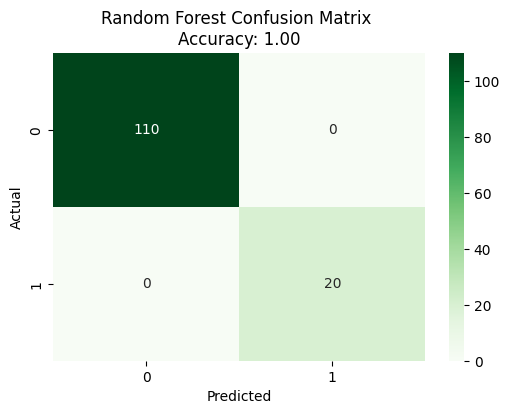

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_predict_rf), annot =True, fmt='d', cmap='Greens')
plt.title(f'Random Forest Confusion Matrix \nAccuracy: {accuracy_score(y_test, y_predict_rf):.2f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
y.value_counts(normalize=True)

,proportion
Dropped_Out,
0,0.845917
1,0.154083


Feature Importance

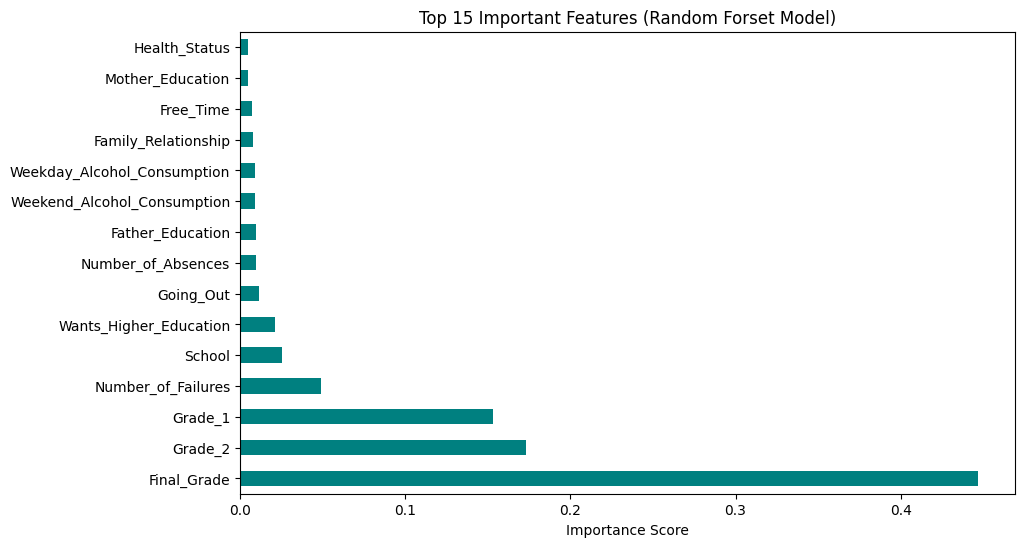

In [ ]:
importances = pd.Series(rf.feature_importances_, index=x.columns)
importances.sort_values(ascending=True).tail(15).plot(kind='barh', figsize=(10, 6), color='teal')
plt.title("Top 15 Important Features (Random Forset Model)")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()

Saving Data and Models

In [ ]:
joblib.dump(lr, 'Logistic_model.pkl')
joblib.dump(rf, 'RandomForset_model.pkl')
dfCleaned.to_csv("cleaned_student_data.csv", index=False)

Model use

In [ ]:
sample = x_test.iloc[0:1]
sample

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Travel_Time,Study_Time,...,Mother_Job_teacher,Father_Job_health,Father_Job_other,Father_Job_services,Father_Job_teacher,Reason_for_Choosing_School_home,Reason_for_Choosing_School_other,Reason_for_Choosing_School_reputation,Guardian_mother,Guardian_other
21,0,1,15,1,0,1,4,4,1,1,...,False,True,False,False,False,False,True,False,False,False


In [ ]:
use_lr = joblib.load('Logistic_model.pkl')
prediction = use_lr.predict(sample)
# 0 no dropout
prediction

array([0])

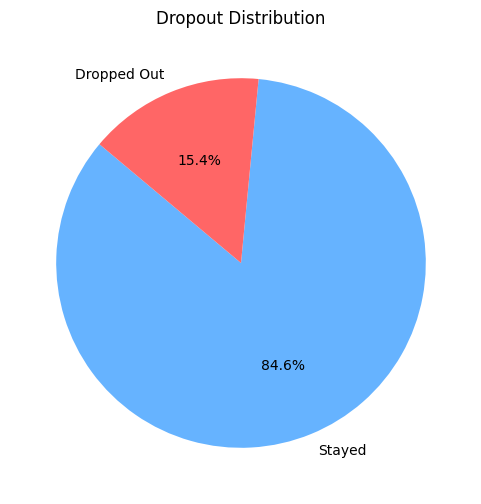

In [ ]:
labels = ['Stayed', 'Dropped Out']
sizes = df['Dropped_Out'].value_counts()
colors = ['#66b3ff', '#ff6666']
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Dropout Distribution')
plt.show()


/tmp/ipython-input-66-2254184085.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender', y='Dropped_Out', data=df, ci=None)


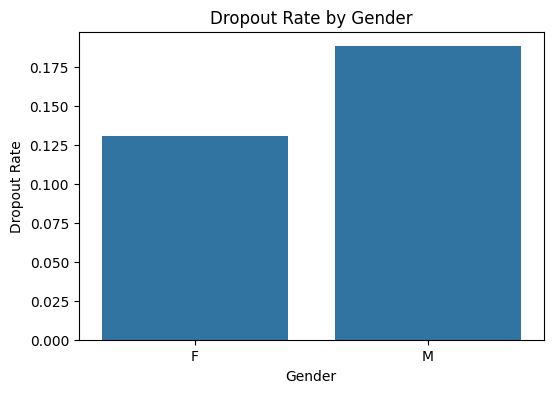

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='Gender', y='Dropped_Out', data=df, ci=None)
plt.title('Dropout Rate by Gender')
plt.ylabel('Dropout Rate')
plt.show()


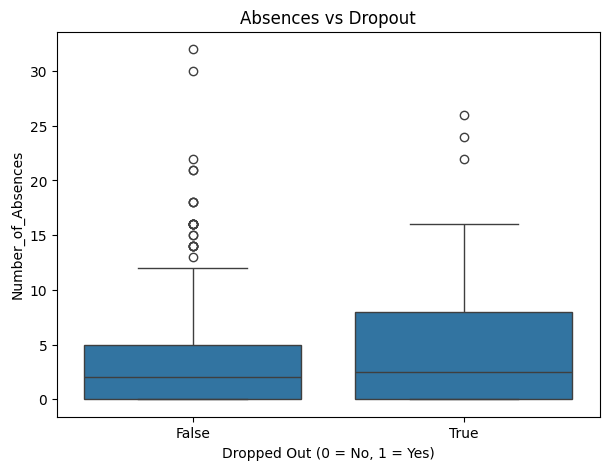

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Dropped_Out', y='Number_of_Absences', data=df)
plt.title('Absences vs Dropout')
plt.xlabel('Dropped Out (0 = No, 1 = Yes)')
plt.show()


/tmp/ipython-input-68-4114098003.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')


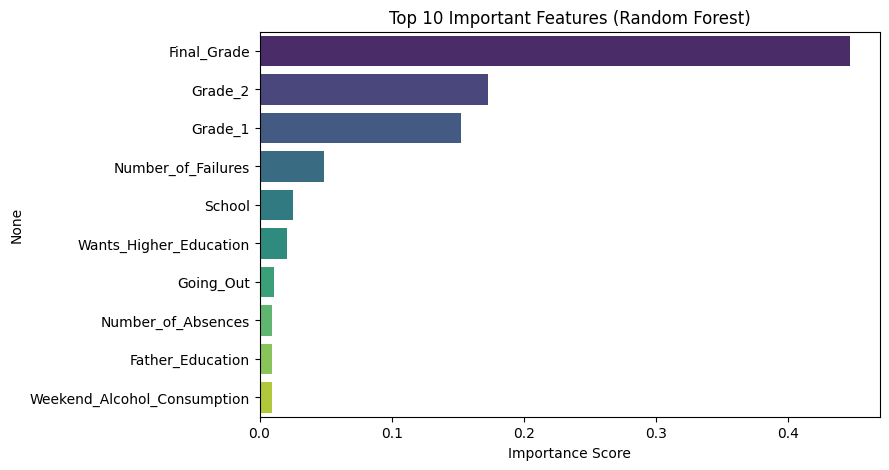

In [ ]:
importances = rf.feature_importances_
features = pd.Series(importances, index=x_train.columns)
top_features = features.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title('Top 10 Important Features (Random Forest)')
plt.xlabel('Importance Score')
plt.show()

/tmp/ipython-input-69-1260155671.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features_lr.values, y=top_features_lr.index, palette='viridis')


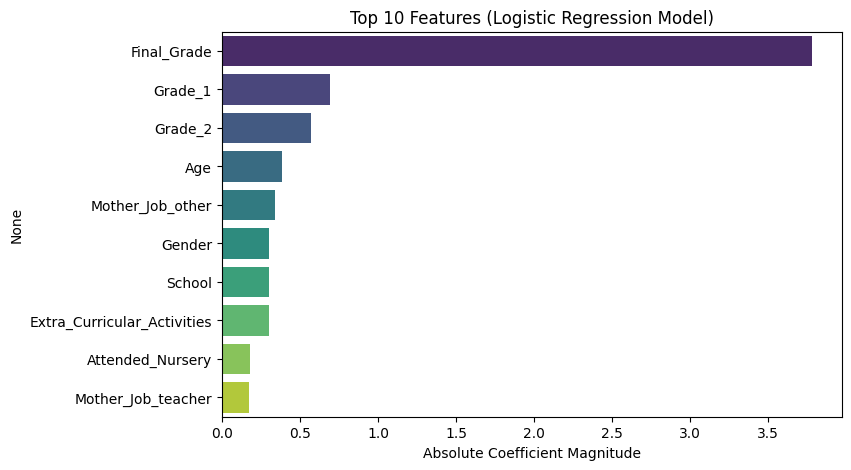

In [ ]:
coefficients = lr.coef_[0]

coef_series = pd.Series(coefficients, index=x_train.columns)

abs_coef_series = abs(coef_series).sort_values(ascending=False)

top_features_lr = abs_coef_series.head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_features_lr.values, y=top_features_lr.index, palette='viridis')
plt.title('Top 10 Features (Logistic Regression Model)')
plt.xlabel('Absolute Coefficient Magnitude')
plt.show()

Text(0.5, 1.0, 'Dropout by Gender')

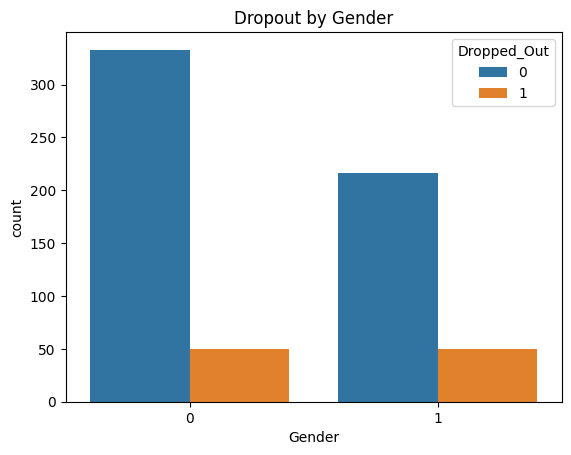

In [ ]:
sns.countplot(x='Gender', hue='Dropped_Out', data=dfCleaned)
plt.title('Dropout by Gender')

Text(0.5, 1.0, 'Age Distribution by Dropout Status')

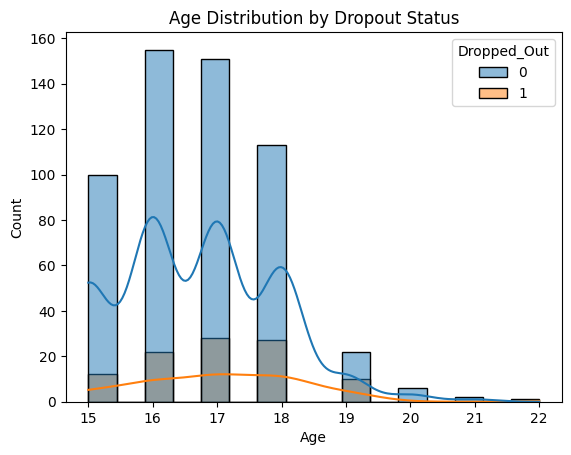

In [ ]:
#Age vs Dropout
sns.histplot(data=dfCleaned, x='Age', hue='Dropped_Out', kde=True)
plt.title('Age Distribution by Dropout Status')

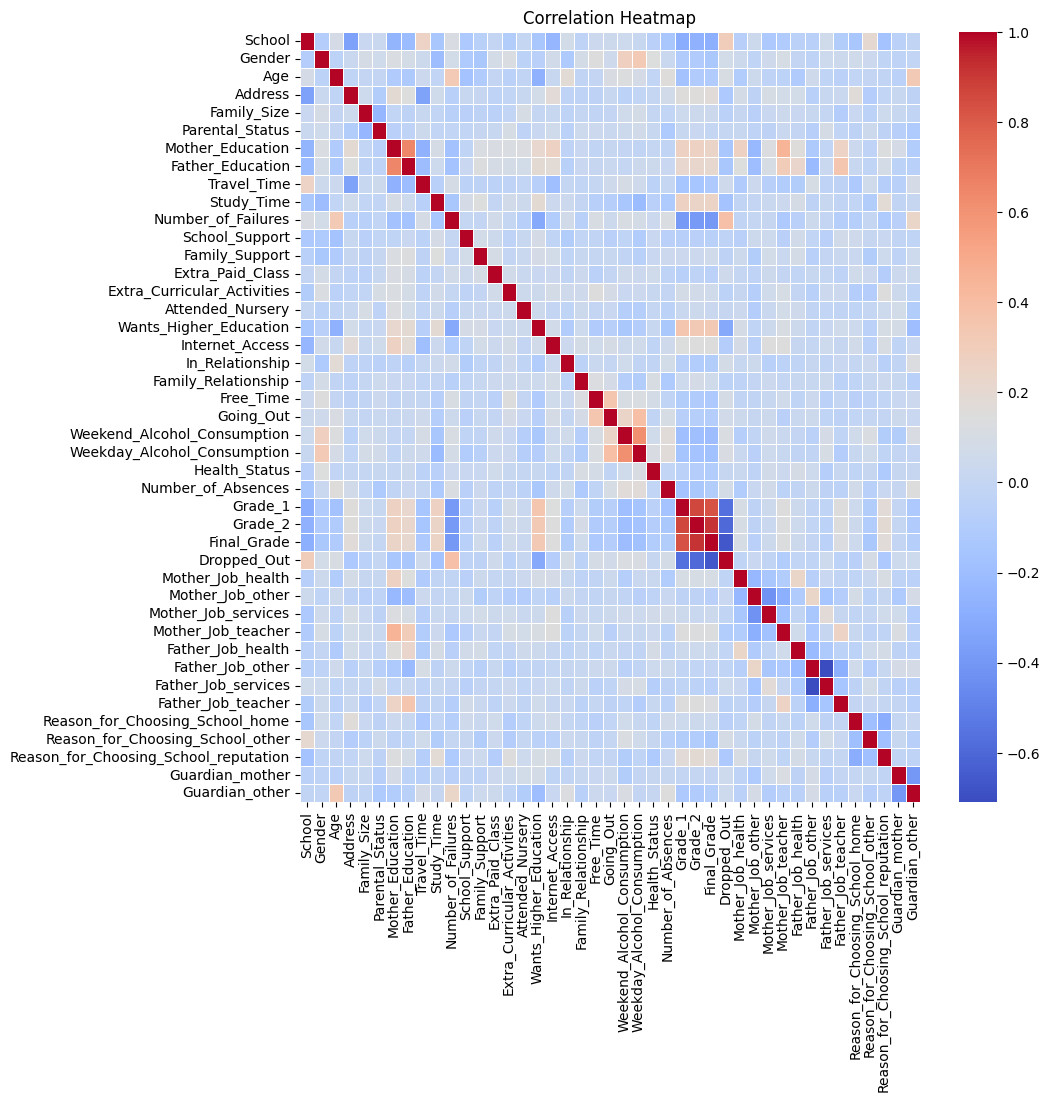

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(dfCleaned.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()